# Import Library dan Load Data

In [ ]:
import pandas as pd
import numpy as np

#Seleksi Feature
from sklearn.feature_selection import SelectKBest, f_classif
#Standarisasi feature
from sklearn.preprocessing import StandardScaler
#Oversampling
from imblearn.over_sampling import RandomOverSampler
#Import Decision Tree Classifier dan Cross Validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


#Impore KNeighbors Clasifier
from sklearn.neighbors import KNeighborsClassifier
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
#Tuning Hyperparameter Naive Bayes dengan GaussianNB
from sklearn.naive_bayes import GaussianNB

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#List nama feature
nama_kolom = ['sepal length (cm)', 'sepal width in (cm)', 'petal length in (cm)', 'petal width in (cm)', 'class']

#Load data dan lihat data
newdata = pd.read_csv('/content/iris.csv', header=None, names=nama_kolom)

#Permisalan pada data Class
encode = newdata['class'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(encode, start=1)}
newdata['class'] = newdata['class'].map(pemetaan)

newdata.head(10)

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [ ]:
print(newdata.shape)

(150, 5)


In [ ]:
#Cek missing value
missing_value_cek = newdata.isnull().sum()
missing_value_cek

sepal length (cm)       0
sepal width in (cm)     0
petal length in (cm)    0
petal width in (cm)     0
class                   0
dtype: int64

In [ ]:
#Pisah Feature dan Target
X = newdata.drop(columns='class', axis=1)
y = newdata['class']

# Pre processing Data

Split Data

In [ ]:
#Pisah Feature dan Target
X = newdata.drop(columns='class', axis=1)
y = newdata['class']

Seleksi Feature jadi 3

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Contoh dengan SelectKBest dan f-score
selector = SelectKBest(score_func=f_classif, k=3)  # Pilih 3 fitur terbaik
X_new = selector.fit_transform(X, y)

In [ ]:
# Membuat data frame untuk feature yang sudah dipilih
nama_feature =['sepal length (cm)', 'petal length in (cm)', 'petal width in (cm)']
data_X_new = pd.DataFrame(X_new, columns = nama_feature)
data_X_new.head()

,sepal length (cm),petal length in (cm),petal width in (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


Standarisasi

In [ ]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(data_X_new)

stardardized_data = pd.DataFrame(standardized, columns = nama_feature)
stardardized_data.head()

,sepal length (cm),petal length in (cm),petal width in (cm)
0,-0.900681,-1.341272,-1.312977
1,-1.143017,-1.341272,-1.312977
2,-1.385353,-1.398138,-1.312977
3,-1.506521,-1.284407,-1.312977
4,-1.021849,-1.341272,-1.312977


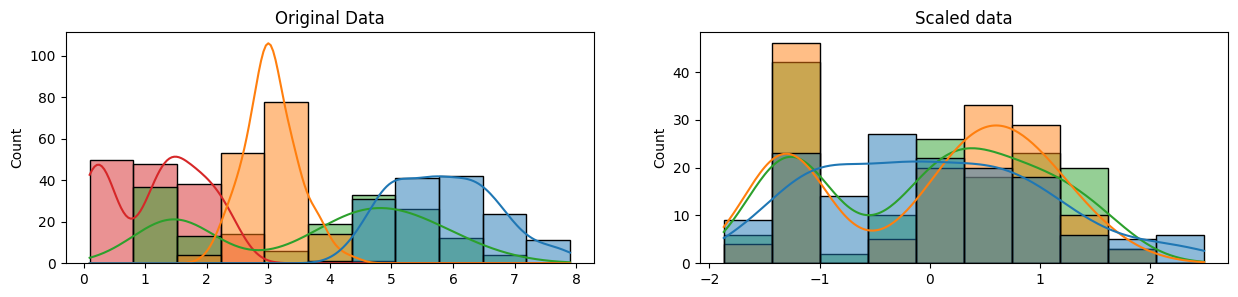

In [ ]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Lihat banyaknya data label class

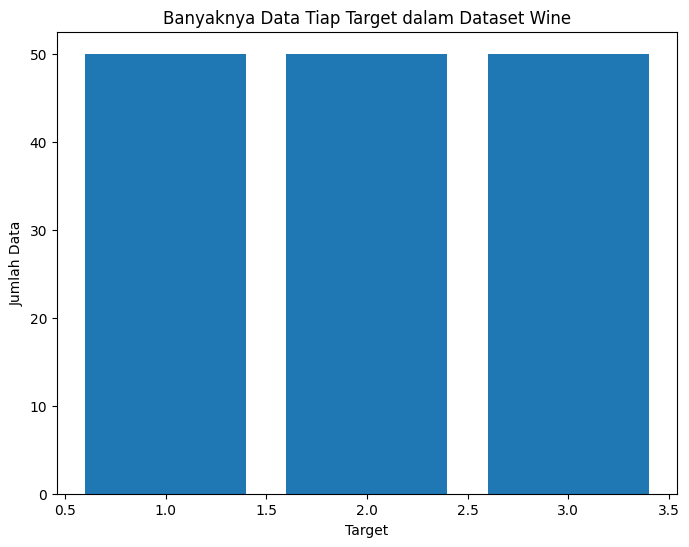

{1: 50, 2: 50, 3: 50}


In [ ]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Target')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Dataset Wine')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(stardardized_data, y)

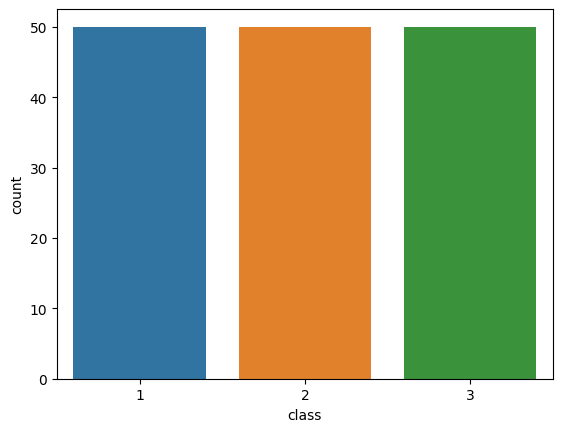

{1: 50, 2: 50, 3: 50}


In [ ]:
sns.countplot(x=balY)
plt.show()

unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

In [ ]:
X = balX
y = balY

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
cv_validate_DT=cross_validate(clf, X, y, cv=12, return_train_score=True)
cv_score_DT=cross_val_score(clf, X, y, cv=12)

In [ ]:
print (cv_validate_DT['train_score'].mean(), cv_validate_DT['test_score'].mean())

1.0 0.952991452991453


In [ ]:
print(cv_score_DT.mean()) #test_score

0.952991452991453


<function matplotlib.pyplot.show(close=None, block=None)>

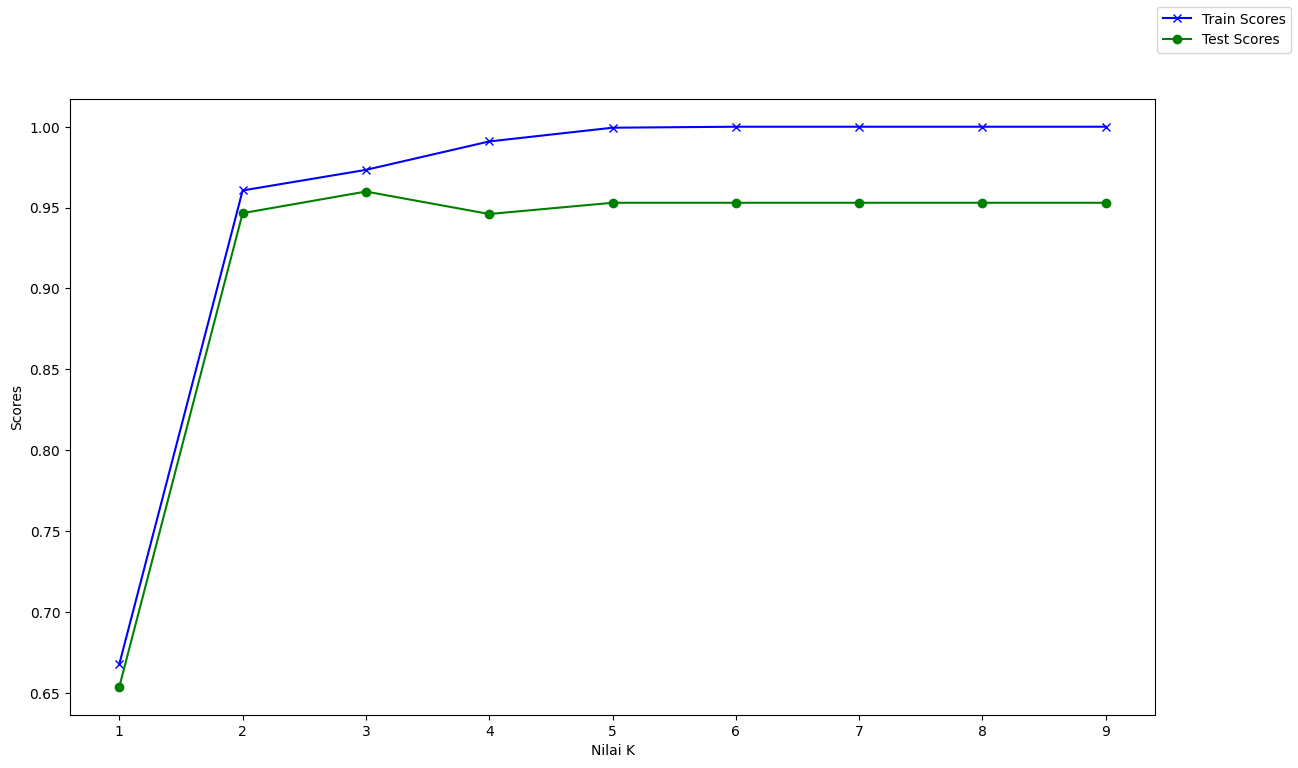

In [ ]:
def clf_predict(k) :
    model_clf = DecisionTreeClassifier(max_depth=k)
    score = cross_validate(model_clf ,X, y, cv=12, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

#Tuning Hyperparameter max_depth Decision Tree manual
train_scores=[]
test_scores=[]
for k in range (1,10):
    train_score, test_score=clf_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)


fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(1,10),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(1,10),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_clf = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':np.arange(1,10),}
scoring_metrics = ['accuracy', 'f1_macro']

gs_clf = GridSearchCV(estimator=clf, param_grid=param_grid_clf, cv=cv_method,verbose=1, scoring=scoring_metrics, refit='accuracy')
gs_clf.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_clf.best_params_)
print("Best Score (Accuracy):", gs_clf.best_score_)
print("Best Score (F1 Macro):", gs_clf.cv_results_['mean_test_f1_macro'][gs_clf.best_index_])

Fitting 30 folds for each of 27 candidates, totalling 810 fits
Best Parameters (Accuracy): {'criterion': 'gini', 'max_depth': 8}
Best Score (Accuracy): 0.9511111111111111
Best Score (F1 Macro): 0.9503759820426488


# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=43, weights='distance')

cv_validate_KNN=cross_validate(knn ,X, y, cv=12, return_train_score=True)
cv_score_KNN=cross_val_score(knn, X, y, cv=12)

In [ ]:
print (cv_validate_KNN['train_score'].mean(), cv_validate_KNN['test_score'].mean())

1.0 0.9599358974358975


In [ ]:
print(cv_score_KNN.mean()) #test_score

0.9599358974358975


<function matplotlib.pyplot.show(close=None, block=None)>

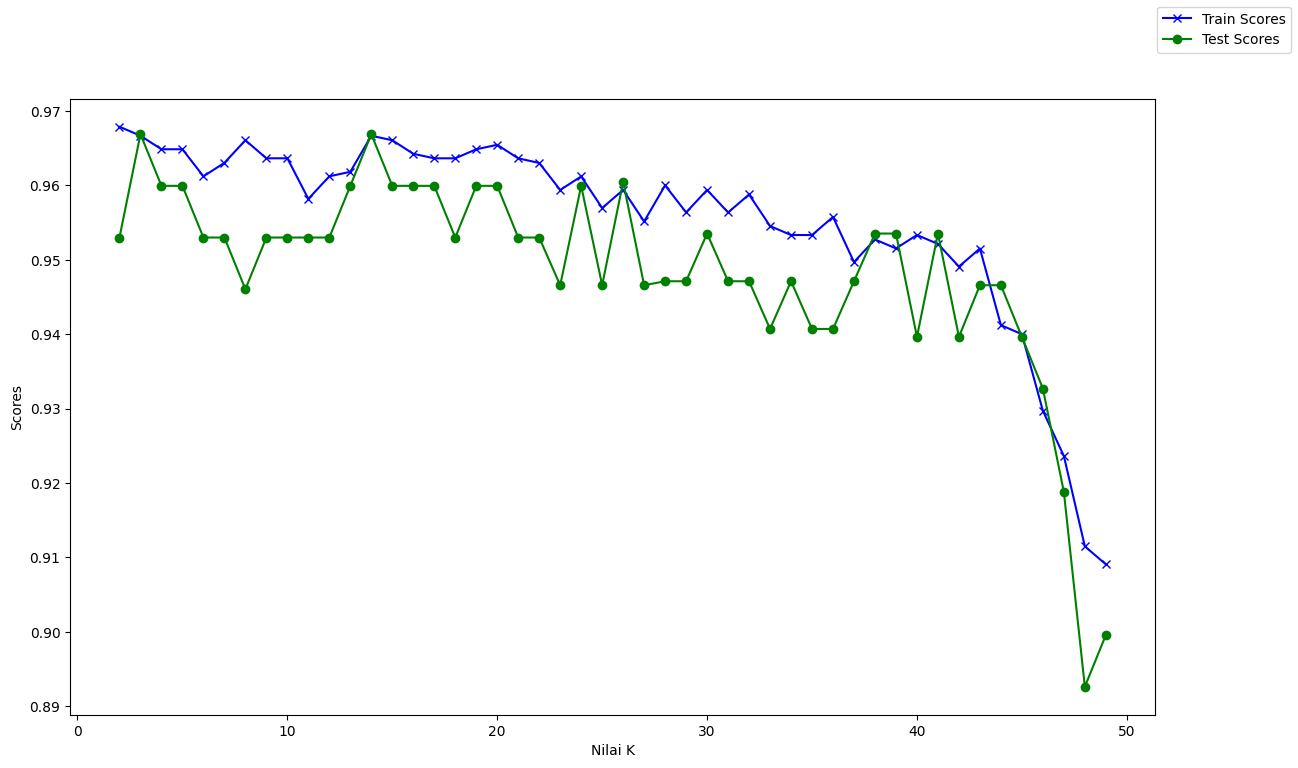

In [ ]:
def knn_predict(k) :
    model_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model_knn ,X, y, cv=12, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

#Tuning Hyperparameter KNN manual
train_scores=[]
test_scores=[]
for k in range (2,50):
    train_score, test_score=knn_predict(k)
    train_scores.append(train_score)
    test_scores.append(test_score)


fig,ax = plt.subplots(figsize=(14,8))
ax.plot(range(2,50),train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2,50),test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Scores')
fig.legend()
plt.show

In [ ]:
#Tuning Hyperparameter KNN otomatis dengan GridSearchCV
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(5,50),'weights':['distance','uniform']}
scoring_metrics = ['accuracy', 'f1_macro']

gscv=GridSearchCV(model, param_grid=param_grid, scoring=scoring_metrics, cv=5, refit='accuracy')
gscv.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gscv.best_params_)
print("Best Score (Accuracy):", gscv.best_score_)
print("Best Score (F1 Macro):", gscv.cv_results_['mean_test_f1_macro'][gscv.best_index_])

Best Parameters (Accuracy): {'n_neighbors': 16, 'weights': 'uniform'}
Best Score (Accuracy): 0.9666666666666668
Best Score (F1 Macro): 0.9665831244778612


# Naive Bayers

In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
cv_score1=cross_validate(model,X,y,cv=10, return_train_score=True)
cv_score2=cross_val_score(model,X,y,cv=10)

print (cv_score1['train_score'].mean(), cv_score1['test_score'].mean())

0.9651851851851851 0.96


In [ ]:
print(cv_score2.mean()) #test_score

0.96


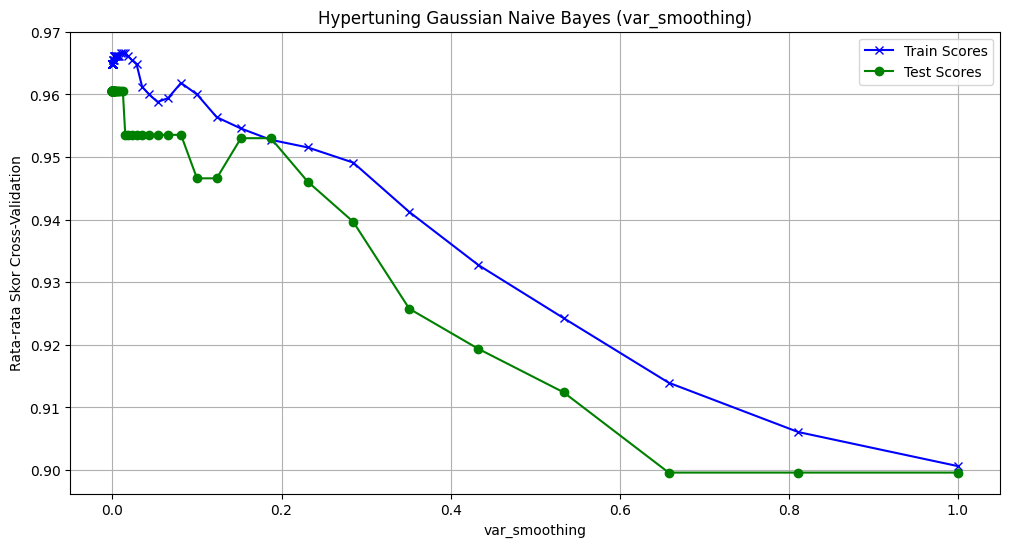

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

def gnb_predict(var_smoothing):
    model_gnb = GaussianNB(var_smoothing=var_smoothing)
    scores = cross_validate(model_gnb, X, y, cv=12, return_train_score=True)
    return scores['train_score'].mean(), scores['test_score'].mean()

var_smoothing_values = np.logspace(0, -9, num=100)  # Sesuaikan num sesuai kebutuhan

mean_train_scores = []
mean_test_scores = []
for var_smoothing in var_smoothing_values:
    train_score, test_score = gnb_predict(var_smoothing)
    mean_train_scores.append(train_score)
    mean_test_scores.append(test_score)

# Plot hasil hypertuning
plt.figure(figsize=(12, 6))
plt.plot(var_smoothing_values, mean_train_scores, marker='x', linestyle='-', color='b', label='Train Scores')
plt.plot(var_smoothing_values, mean_test_scores, marker='o', linestyle='-', color='g', label='Test Scores')
plt.title('Hypertuning Gaussian Naive Bayes (var_smoothing)')
plt.xlabel('var_smoothing')
plt.ylabel('Rata-rata Skor Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
scoring_metrics = ['accuracy', 'f1_macro']

gs_NB = GridSearchCV(estimator=model, param_grid=param_grid_nb, cv=cv_method,verbose=1,scoring=scoring_metrics, refit='accuracy')
gs_NB.fit(X,y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", gs_NB.best_params_)
print("Best Score (Accuracy):", gs_NB.best_score_)
print("Best Score (F1 Macro):", gs_NB.cv_results_['mean_test_f1_macro'][gs_NB.best_index_])

Fitting 30 folds for each of 100 candidates, totalling 3000 fits
Best Parameters (Accuracy): {'var_smoothing': 0.02310129700083159}
Best Score (Accuracy): 0.9577777777777778
Best Score (F1 Macro): 0.9571156004489337


# Support Vector Machine

In [ ]:
#Liniear SVC
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

clf = LinearSVC()

# Train Decision Tree Classifer
cv_validate_SVC=cross_validate(clf, X, y, cv=12, return_train_score=True)
cv_score_SVC=cross_val_score(clf, X, y, cv=12)

print(cv_validate_SVC['train_score'].mean(), cv_validate_SVC['test_score'].mean())

0.9624237455481507 0.952991452991453


In [ ]:
print(cv_score_SVC.mean()) #test_score

0.952991452991453


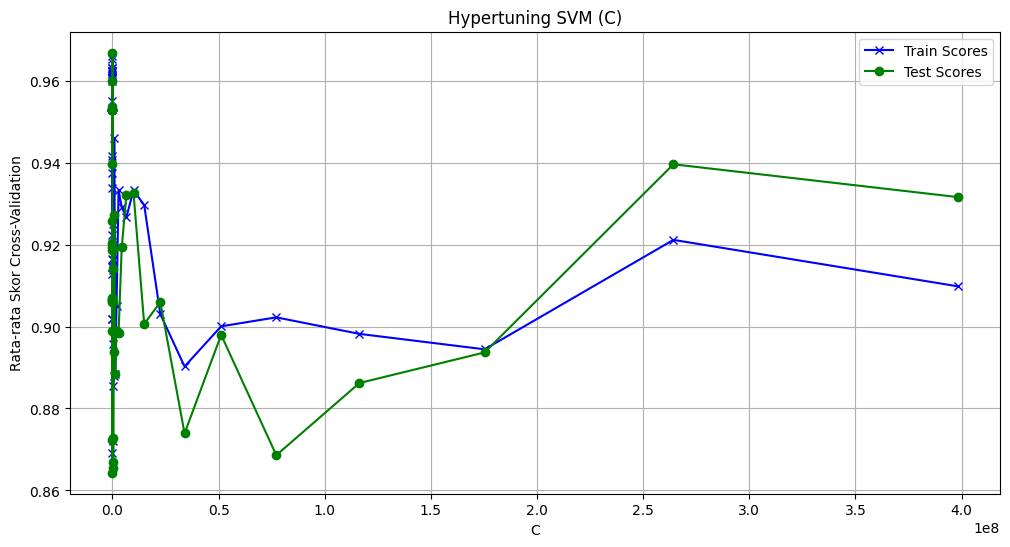

In [ ]:
def svm_predict(C):
    clf = LinearSVC(C=C)
    scores = cross_validate(clf, X, y, cv=12, return_train_score=True)
    return scores['train_score'].mean(), scores['test_score'].mean()

C_values = np.logspace(start = -15, stop = 1000, base = 1.02)

mean_train_scores = []
mean_test_scores = []
for C in C_values:
    train_score, test_score = svm_predict(C)
    mean_train_scores.append(train_score)
    mean_test_scores.append(test_score)

# Plot hasil hypertuning
plt.figure(figsize=(12, 6))
plt.plot(C_values, mean_train_scores, marker='x', linestyle='-', color='b', label='Train Scores')
plt.plot(C_values, mean_test_scores, marker='o', linestyle='-', color='g', label='Test Scores')
plt.title('Hypertuning SVM (C)')
plt.xlabel('C')
plt.ylabel('Rata-rata Skor Cross-Validation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Splid data dengan RepeatedStratifiedKFold dan Tuning Hyperparameter dengan GridSearchCV
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=3, random_state=999)
scoring_metrics = ['accuracy', 'f1_macro']

c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}


grid = GridSearchCV(clf, param_grid =param_grid, cv=cv_method, n_jobs=-1, scoring=scoring_metrics, refit='accuracy')
grid.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik untuk akurasi dan F1-score macro
print("Best Parameters (Accuracy):", grid.best_params_)
print("Best Score (Accuracy):", grid.best_score_ * 100)
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X, y) * 100 ) )
print("Best Score (F1 Macro):", grid.cv_results_['mean_test_f1_macro'][grid.best_index_])

Best Parameters (Accuracy): {'C': 153.7803409519843}
Best Score (Accuracy): 96.00000000000001
Best estimator accuracy on test set 96.67 
Best Score (F1 Macro): 0.9593602693602693


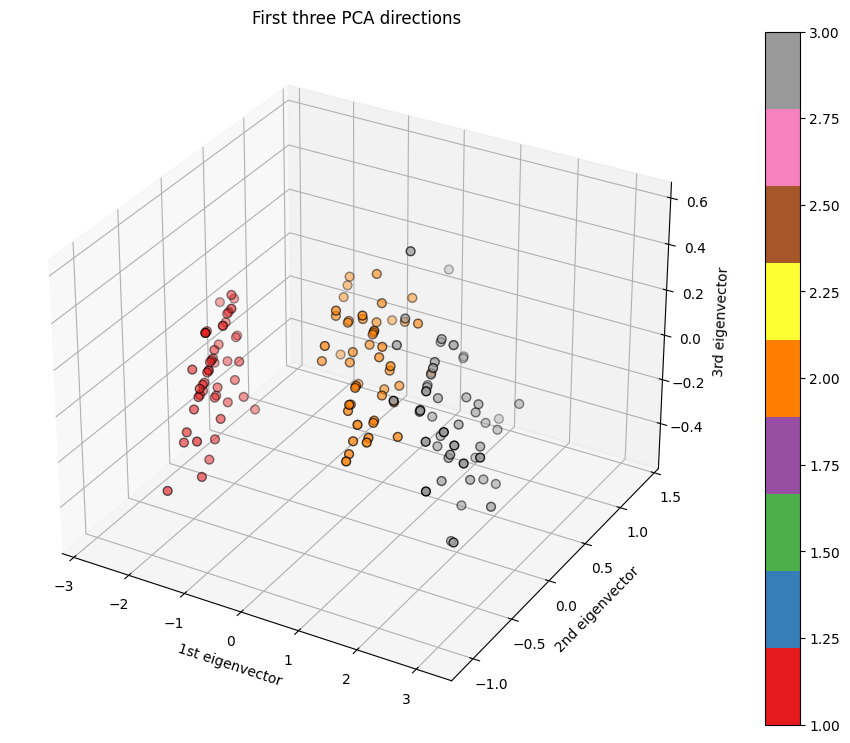

The number of features in the new subspace is 3


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Misalkan x adalah data Anda dan y adalah target label

# 1. Scaling data Anda jika belum melakukannya
# x_scaled = ...

# 2. Melakukan reduksi dimensi dengan PCA
pca = PCA(n_components=3)
x_reduced = pca.fit_transform(X)

# 3. Membuat plot 3D
fig = plt.figure(1, figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')  # Menggunakan fig.add_subplot untuk menghindari kesalahan

# 4. Menampilkan scatter plot pada ruang 3D
scatter = ax.scatter(x_reduced[:, 0], x_reduced[:, 1], x_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# 5. Menambahkan colorbar
plt.colorbar(scatter)

plt.show()

print("The number of features in the new subspace is", x_reduced.shape[1])